__Content:__
- 4.2.1 Stripplot
- 4.2.2 Swarmplot
- 4.2.3 Boxplot
- 4.2.4 Violinplot
- 4.2.5 Countplot
- 4.2.6 Barplot
- 4.2.7 Pointplot

__Import Libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

__Import data__

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# Iris data in wide-form
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Melt iris data to long-form
irislong = pd.melt(iris,id_vars='species', var_name='measurement')
irislong.head()

,species,measurement,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


## 4.2.1 Stripplot

Stripplot is also known as dotplot in Minitab/Excel. It shows all the data points for each category.

Data can be in long-form or wide-form.

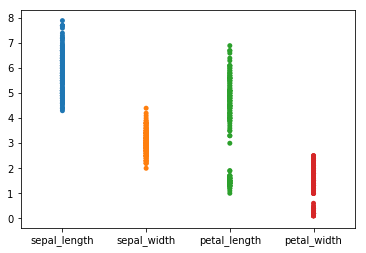

In [5]:
# Plotting using wide-form iris data, each numeric column will be plotted
sns.stripplot(data=iris);

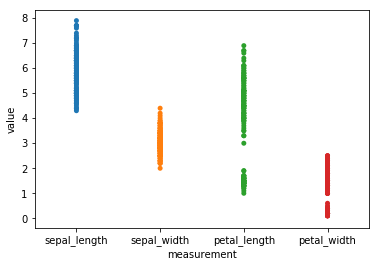

In [6]:
# Plottin using long-form iris data, indicate x, y values
sns.stripplot(x='measurement',y='value',data=irislong);

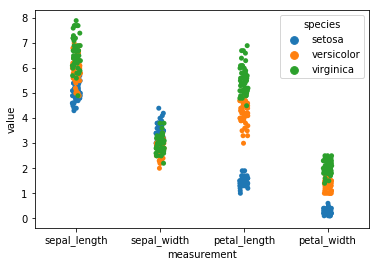

In [7]:
# Long-form of data is preferred to take advantage of hue parameter, which allows visualisation of a second categorical variable
sns.stripplot(x='measurement',y='value',data=irislong,hue='species',jitter=0.05);

## 4.2.2 Swarmplot

Swarmplot is similar to stripplot, but the points are adjusted automatically so that they don't overlap.

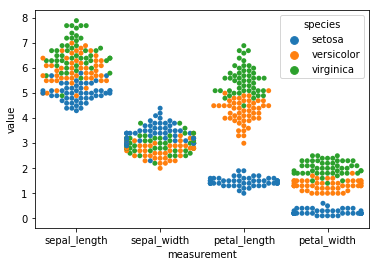

In [8]:
sns.swarmplot(x='measurement',y='value',hue='species',data=irislong);

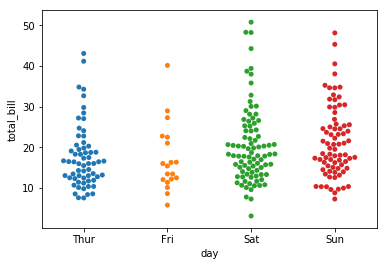

In [9]:
# Another example using Tips data set
sns.swarmplot(x="day", y="total_bill", data=tips);

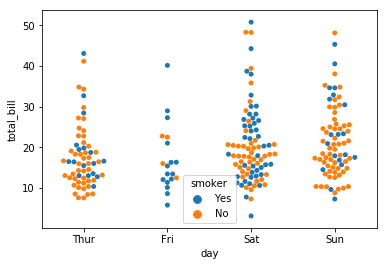

In [10]:
sns.swarmplot(x="day", y="total_bill", hue='smoker', data=tips);

## 4.2.3 Boxplot

Boxplot can be applied to long-form or wide-form of data. But long-form is preferred to take advantage of hue parameter.

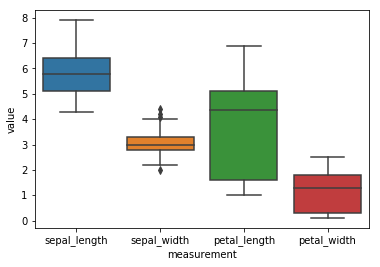

In [11]:
sns.boxplot(x='measurement',y='value',data=irislong);

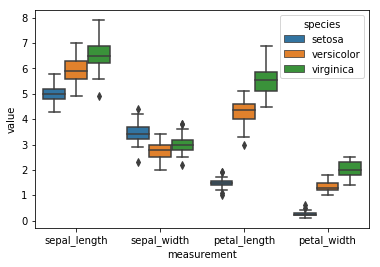

In [12]:
sns.boxplot(x='measurement',y='value',hue='species',data=irislong);

__Combining boxplot with swarmplot__

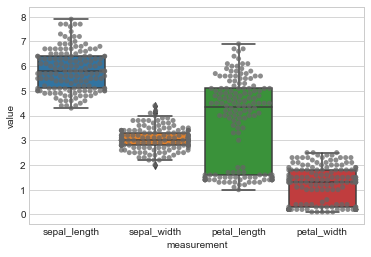

In [13]:
sns.set_style("whitegrid")
sns.boxplot(x='measurement',y='value',data=irislong);
sns.swarmplot(x='measurement',y='value',data=irislong,color='0.4',alpha=0.75);

## 4.2.4 Violinplot

Violinplot draws a combination of boxplot and kde plot.

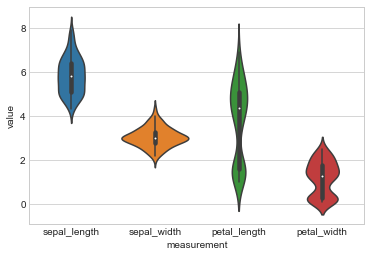

In [14]:
sns.violinplot(x='measurement',y='value',data=irislong);

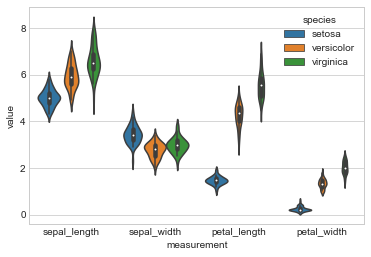

In [15]:
sns.violinplot(x='measurement',y='value',hue='species',data=irislong);

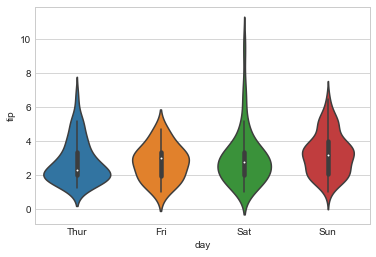

In [16]:
sns.violinplot(x='day',y='tip',data=tips);

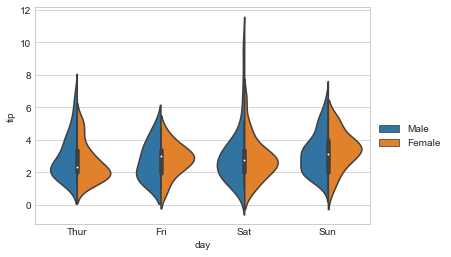

In [17]:
# Split the violin into half for a second categorical (binary) variable.
ax = sns.violinplot(x='day',y='tip',data=tips,hue='sex',split=True) # Use dodge instead of split for new version 8.0
ax.legend(bbox_to_anchor=(1,0.5));

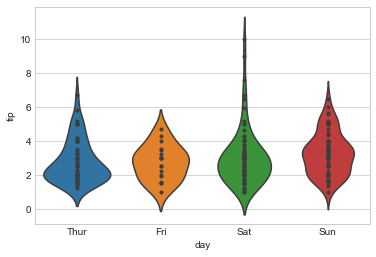

In [18]:
# Customising the inner of violinplot
# Default: Box 
# Other choices: point, quartile, stick
sns.violinplot(x='day',y='tip',data=tips,inner='point');

__Combining violinplot with swarmplot.__

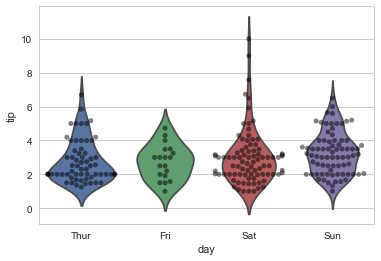

In [53]:
sns.violinplot(x='day',y='tip',data=tips,inner=None)
sns.swarmplot(x='day',y='tip',data=tips,color='k',alpha=0.5);

## 4.2.5 Countplot

The traditional bar chart is called Countplot in Seaborn. 

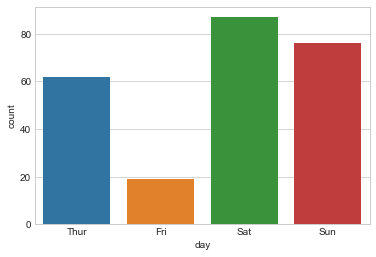

In [19]:
# Count the frequency of each categorical variable
sns.countplot(x='day',data=tips);

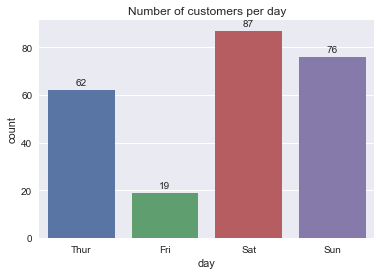

In [12]:
# Display the count for each bar
ax = sns.countplot(x='day',data=tips);
for p in ax.patches:
    h = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, h+2, '{:1.0f}'.format(h), ha="center") 
ax.set_title('Number of customers per day');

## 4.2.6 Barplot

In Seaborn, the Barplot shows the point estimate and confidence intervals as bars. It will include an error bar by default.

Do not confuse Seaborn Barplot with traditional bar chart in matplotlib or Excel.

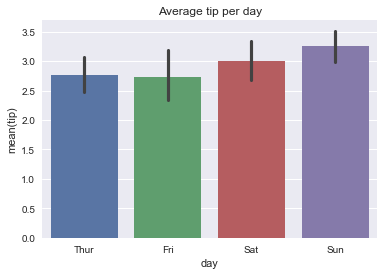

In [15]:
# Average of a numerical variable, with CI (default 95%)
ax = sns.barplot(x='day',y='tip',data=tips)
ax.set_title('Average tip per day');

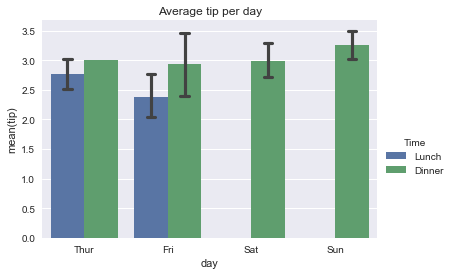

In [35]:
ax = sns.barplot(x='day',y='tip',data=tips,hue='time',capsize=0.1,ci=90)
ax.set_title('Average tip per day')
# Display legend outside the axes
ax.legend(bbox_to_anchor=(1,0.5),title='Time');

## 4.2.7 Pointplot

Pointplot also shows the point estimate and CI like Barplot, but without the bar.

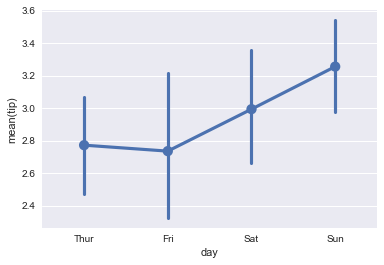

In [8]:
sns.pointplot(x='day',y='tip',data=tips);

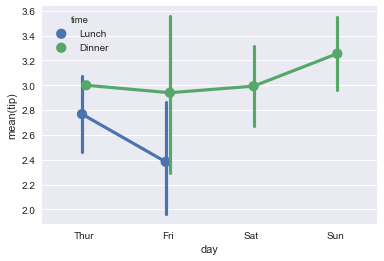

In [10]:
sns.pointplot(x='day',y='tip',hue='time',data=tips,dodge=True);